In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

soil_df = pd.read_csv("../AucklandMotatStationNiwa_08June24/SoilMoisture(20cm).csv", parse_dates=True)
soil_df.head()

,Date,SoilMoist(%)
0,20160301,37.4
1,20160301,37.6
2,20160301,37.6
3,20160301,37.7
4,20160301,37.8


In [59]:
daily_soil = soil_df.groupby(level=0).mean()
daily_soil

,Date,SoilMoist(%)
0,20160301.0,37.4
1,20160301.0,37.6
2,20160301.0,37.6
3,20160301.0,37.7
4,20160301.0,37.8
...,...,...
61991,20230328.0,35.5
61992,20230328.0,35.5
61993,20230328.0,35.5
61994,20230328.0,35.5


In [60]:
daily_auckland_weather = pd.read_csv("../AucklandMotatStationNiwa_08June24/CombineDaily9am.csv",  parse_dates=True)
daily_auckland_weather.head()

,Date,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),...,Tmin(c),Tgmin(C),ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg
0,20160301,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,...,18.4,18.4,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40
1,20160302,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,...,17.0,15.4,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25
2,20160303,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,...,15.3,12.6,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20
3,20160304,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,...,14.4,10.5,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60
4,20160305,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,...,13.9,9.9,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75


In [61]:
evaporation = pd.read_csv("../AucklandMotatStationNiwa_08June24/Evaporation(open water).csv",  parse_dates=True)
evaporation.head()

,Date,Evaporation(mm)
0,20160301,0.9
1,20160302,1.8
2,20160303,4.2
3,20160304,4.2
4,20160305,4.0


In [62]:
weather_auckland = daily_auckland_weather.merge(evaporation, how='inner', left_index=True, right_index=True)
weather_auckland.head()

,Date_x,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Date_y,Evaporation(mm)
0,20160301,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,20160301,0.9
1,20160302,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,20160302,1.8
2,20160303,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,20160303,4.2
3,20160304,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,20160304,4.2
4,20160305,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,20160305,4.0


In [63]:
weather_auckland = weather_auckland.merge(daily_soil, how='inner', left_index=True, right_index=True)
# weather_auckland.to_csv('../AucklandMotatStationNiwa_08June24/weather_auckland_2016_2024.csv')
weather_auckland.head()


,Date_x,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),...,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Date_y,Evaporation(mm),Date,SoilMoist(%)
0,20160301,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,...,21.5,1014.4,1012.5,1.3,6.21,20.40,20160301,0.9,20160301.0,37.4
1,20160302,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,...,21.5,1019.3,1017.4,7.6,15.02,20.25,20160302,1.8,20160301.0,37.6
2,20160303,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,...,21.5,1028.0,1026.1,9.4,20.46,19.20,20160303,4.2,20160301.0,37.6
3,20160304,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,...,21.6,1027.6,1025.7,9.3,19.20,19.60,20160304,4.2,20160301.0,37.7
4,20160305,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,...,21.5,1025.6,1023.7,12.1,24.18,19.75,20160305,4.0,20160301.0,37.8


In [64]:
weather_auckland.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2939 entries, 0 to 2938
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date_x           2939 non-null   int64  
 1   WDir(Deg)        2939 non-null   float64
 2   WSpd(m/s)        2939 non-null   float64
 3   GustDir(Deg)     2939 non-null   float64
 4   GustSpd(m/s)     2939 non-null   float64
 5   WindRun(Km)      2939 non-null   float64
 6   Rain(mm)         2939 non-null   float64
 7   Tdry(c)          2939 non-null   float64
 8   Twet(c)          2939 non-null   float64
 9   RH(%)            2939 non-null   float64
 10  Tmax(c)          2939 non-null   float64
 11  Tmin(c)          2939 non-null   float64
 12  Tgmin(C)         2939 non-null   float64
 13  ET10©            2939 non-null   float64
 14  ET20©            2939 non-null   float64
 15  ET100©           2939 non-null   float64
 16  Pmsl(hPa)        2939 non-null   float64
 17  Pstn(hPa)        29

In [65]:
weather_auckland.head()

,Date_x,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),...,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Date_y,Evaporation(mm),Date,SoilMoist(%)
0,20160301,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,...,21.5,1014.4,1012.5,1.3,6.21,20.40,20160301,0.9,20160301.0,37.4
1,20160302,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,...,21.5,1019.3,1017.4,7.6,15.02,20.25,20160302,1.8,20160301.0,37.6
2,20160303,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,...,21.5,1028.0,1026.1,9.4,20.46,19.20,20160303,4.2,20160301.0,37.6
3,20160304,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,...,21.6,1027.6,1025.7,9.3,19.20,19.60,20160304,4.2,20160301.0,37.7
4,20160305,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,...,21.5,1025.6,1023.7,12.1,24.18,19.75,20160305,4.0,20160301.0,37.8


In [84]:
weather_auckland = pd.read_csv('../AucklandMotatStationNiwa_08June24/motatstation_weather_auckland_2016_2024.csv', parse_dates=True)
weather_auckland.head()

,Date,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
0,20160301,188.0,1.2,65.0,7.2,172.0,1.8,19.2,18.5,93.0,...,21.3,22.2,21.5,1014.4,1012.5,1.3,6.21,20.40,0.9,37.4
1,20160302,157.0,3.2,60.0,9.3,258.0,0.0,17.9,16.1,82.0,...,20.4,21.7,21.5,1019.3,1017.4,7.6,15.02,20.25,1.8,37.6
2,20160303,134.0,1.9,67.0,10.8,214.0,0.0,18.3,15.7,75.0,...,19.5,20.9,21.5,1028.0,1026.1,9.4,20.46,19.20,4.2,37.6
3,20160304,147.0,1.3,38.0,6.2,134.0,0.0,19.4,16.1,69.0,...,19.9,21.2,21.6,1027.6,1025.7,9.3,19.20,19.60,4.2,37.7
4,20160305,131.0,0.4,197.0,9.3,187.0,0.0,19.0,17.3,84.0,...,19.9,21.2,21.5,1025.6,1023.7,12.1,24.18,19.75,4.0,37.8


In [85]:
test_size_percentage = 0.30
test_size = int(len(weather_auckland) * test_size_percentage)

train_data = weather_auckland.iloc[:-test_size]
test_data = weather_auckland.iloc[-test_size:]
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (2058, 23)
Test data shape: (881, 23)


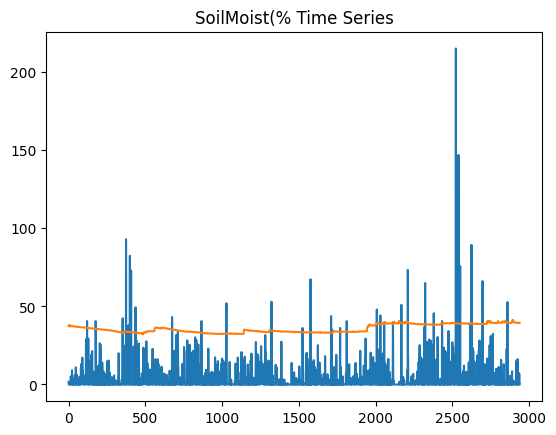

In [86]:
# Visual Inspection to choose between additive and multiplicative method for the Holt-Winters model
import matplotlib.pyplot as plt

weather_auckland['Rain(mm)'].plot(title='Rain(mm) Time Series')
weather_auckland['SoilMoist(%)'].plot(title='SoilMoist(% Time Series')
plt.show()

Typically, an additive model is used when seasonal fluctuations are roughly constant through the series, while a multiplicative model is used when seasonal fluctuations increase or decrease proportionally with the level of the series.

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Adding a small constant to handle zero or negative values
weather_auckland['Rain(mm)_pos'] = weather_auckland['Rain(mm)'] + 1e-6
weather_auckland['SoilMoist(%)_pos'] = weather_auckland['SoilMoist(%)'] + 1e-6

period = 365

# Decompose Rain(mm) time series
decomposition_add_rain = seasonal_decompose(weather_auckland['Rain(mm)'], model='additive', period=period)
decomposition_mul_rain = seasonal_decompose(weather_auckland['Rain(mm)_pos'], model='multiplicative', period=period)

# Decompose SoilMoist(%) time series
decomposition_add_soilmoist = seasonal_decompose(weather_auckland['SoilMoist(%)'], model='additive', period=period)
decomposition_mul_soilmoist = seasonal_decompose(weather_auckland['SoilMoist(%)_pos'], model='multiplicative', period=period)



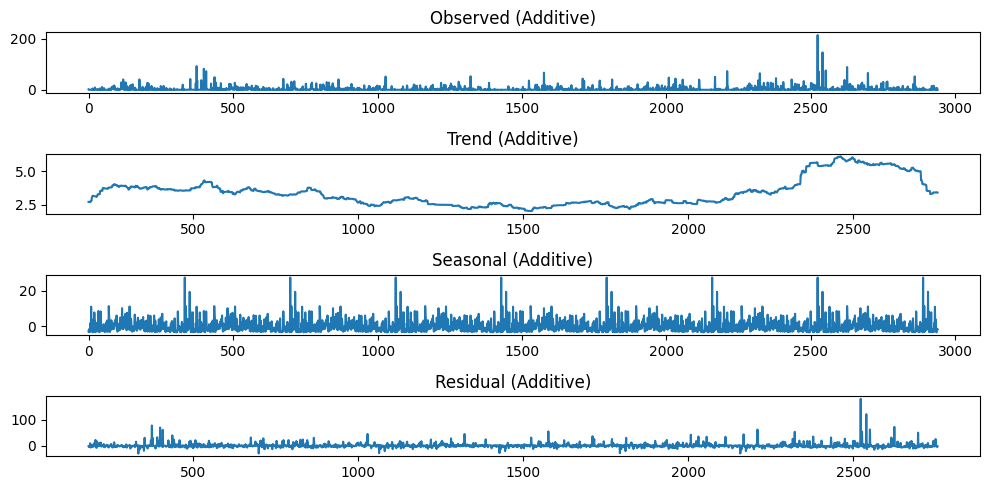

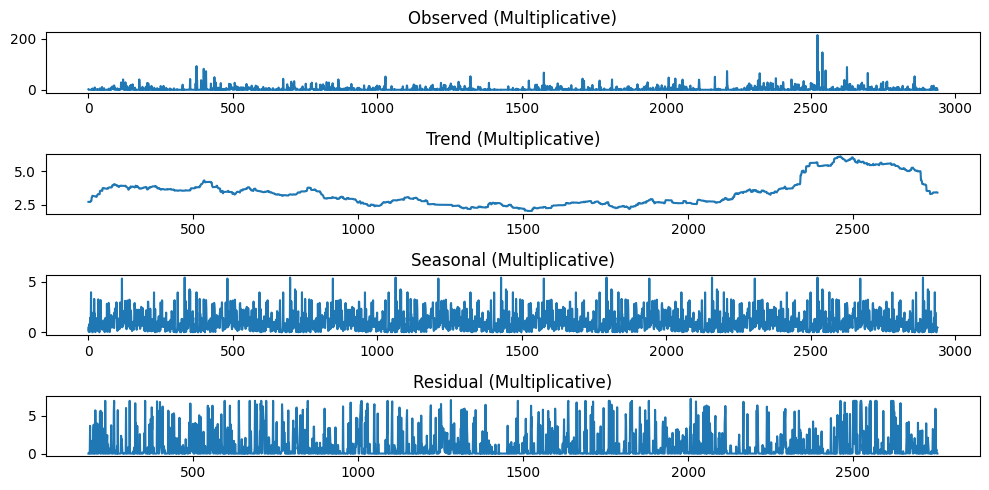

In [88]:
# Plot Additive Decomposition for Rain(mm)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 5))
ax1.plot(decomposition_add_rain.observed)
ax1.set_title('Observed (Additive)')
ax2.plot(decomposition_add_rain.trend)
ax2.set_title('Trend (Additive)')
ax3.plot(decomposition_add_rain.seasonal)
ax3.set_title('Seasonal (Additive)')
ax4.plot(decomposition_add_rain.resid)
ax4.set_title('Residual (Additive)')
plt.tight_layout()
plt.show()

# Plot Multiplicative Decomposition for Rain(mm)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 5))
ax1.plot(decomposition_mul_rain.observed)
ax1.set_title('Observed (Multiplicative)')
ax2.plot(decomposition_mul_rain.trend)
ax2.set_title('Trend (Multiplicative)')
ax3.plot(decomposition_mul_rain.seasonal)
ax3.set_title('Seasonal (Multiplicative)')
ax4.plot(decomposition_mul_rain.resid)
ax4.set_title('Residual (Multiplicative)')
plt.tight_layout()
plt.show()

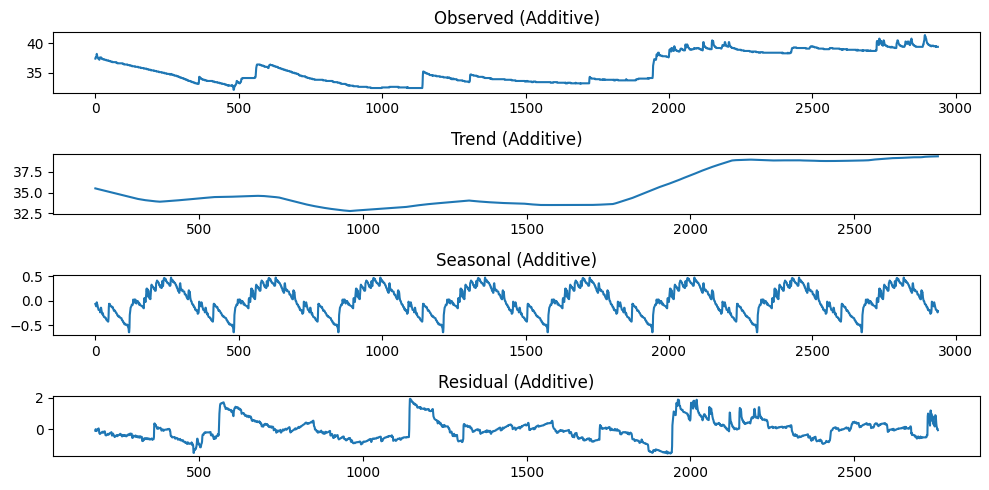

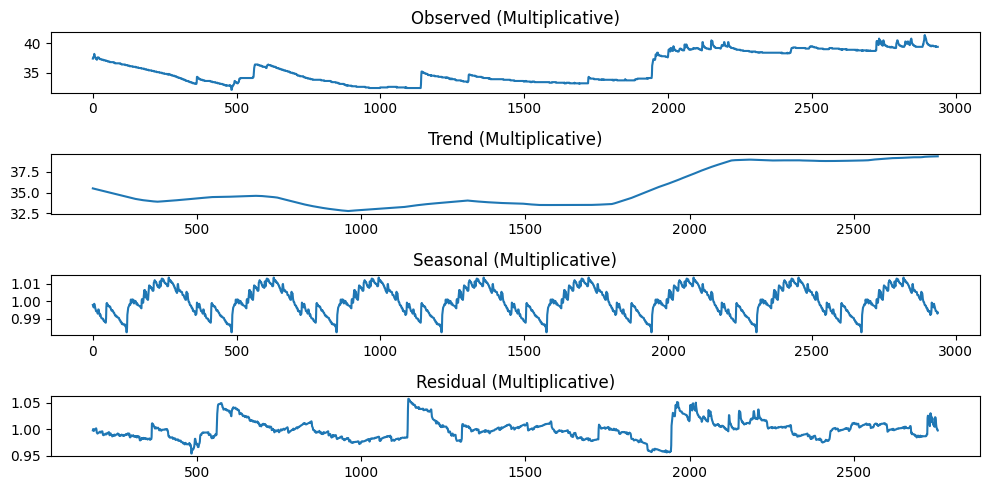

In [89]:
# Plot Additive Decomposition for SoilMoist(%)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 5))
ax1.plot(decomposition_add_soilmoist.observed)
ax1.set_title('Observed (Additive)')
ax2.plot(decomposition_add_soilmoist.trend)
ax2.set_title('Trend (Additive)')
ax3.plot(decomposition_add_soilmoist.seasonal)
ax3.set_title('Seasonal (Additive)')
ax4.plot(decomposition_add_soilmoist.resid)
ax4.set_title('Residual (Additive)')
plt.tight_layout()
plt.show()

# Plot Multiplicative Decomposition for SoilMoist(%)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 5))
ax1.plot(decomposition_mul_soilmoist.observed)
ax1.set_title('Observed (Multiplicative)')
ax2.plot(decomposition_mul_soilmoist.trend)
ax2.set_title('Trend (Multiplicative)')
ax3.plot(decomposition_mul_soilmoist.seasonal)
ax3.set_title('Seasonal (Multiplicative)')
ax4.plot(decomposition_mul_soilmoist.resid)
ax4.set_title('Residual (Multiplicative)')
plt.tight_layout()
plt.show()

In [90]:
# Print Additive Decomposition for Rain(mm)
print("Additive Decomposition for Rain(mm):")
print("Trend:")
print(decomposition_add_rain.trend.head())
print("\nSeasonal:")
print(decomposition_add_rain.seasonal.head())
print("\nResidual:")
print(decomposition_add_rain.resid.head())



Additive Decomposition for Rain(mm):
Trend:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: trend, dtype: float64

Seasonal:
0   -2.907431
1   -2.079956
2   -3.279877
3   -1.451306
4   -2.851306
Name: seasonal, dtype: float64

Residual:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: resid, dtype: float64


In [91]:
# Print Multiplicative Decomposition for Rain(mm)
print("Multiplicative Decomposition for Rain(mm):")
print("Trend:")
print(decomposition_mul_rain.trend.head())
print("\nSeasonal:")
print(decomposition_mul_rain.seasonal.head())
print("\nResidual:")
print(decomposition_mul_rain.resid.head())

Multiplicative Decomposition for Rain(mm):
Trend:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: trend, dtype: float64

Seasonal:
0    0.179238
1    0.541535
2    0.027329
3    0.818635
4    0.219156
Name: seasonal, dtype: float64

Residual:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: resid, dtype: float64


In [92]:
# Print Additive Decomposition for SoilMoist(%)
print("Additive Decomposition for SoilMoist(%):")
print("Trend:")
print(decomposition_add_soilmoist.trend.head())
print("\nSeasonal:")
print(decomposition_add_soilmoist.seasonal.head())
print("\nResidual:")
print(decomposition_add_soilmoist.resid.head())



Additive Decomposition for SoilMoist(%):
Trend:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: trend, dtype: float64

Seasonal:
0   -0.064178
1   -0.080186
2   -0.096311
3   -0.112475
4   -0.085665
Name: seasonal, dtype: float64

Residual:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: resid, dtype: float64


In [93]:
print("Multiplicative Decomposition for SoilMoist(%):")
print("Trend:")
print(decomposition_mul_soilmoist.trend.head())
print("\nSeasonal:")
print(decomposition_mul_soilmoist.seasonal.head())
print("\nResidual:")
print(decomposition_mul_soilmoist.resid.head())

Multiplicative Decomposition for SoilMoist(%):
Trend:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: trend, dtype: float64

Seasonal:
0    0.997875
1    0.997407
2    0.996942
3    0.996470
4    0.997155
Name: seasonal, dtype: float64

Residual:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: resid, dtype: float64


In [94]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_data['Rain(mm)_pos'] = train_data['Rain(mm)'] + 1
train_data['SoilMoist(%)_pos'] = train_data['SoilMoist(%)'] + 1

fitted_model_rain = ExponentialSmoothing(train_data['Rain(mm)_pos'], trend='mul', seasonal='mul', seasonal_periods=30).fit()
fitted_model_soilmoist = ExponentialSmoothing(train_data['SoilMoist(%)_pos'], trend='mul', seasonal='mul', seasonal_periods=30).fit()


C:\Users\Ying\AppData\Local\Temp\ipykernel_13240\1756105506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Rain(mm)_pos'] = train_data['Rain(mm)'] + 1
C:\Users\Ying\AppData\Local\Temp\ipykernel_13240\1756105506.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SoilMoist(%)_pos'] = train_data['SoilMoist(%)'] + 1
f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


f:\YingYing\Level8\Data Science\.conda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [95]:
test_prediction_rain = fitted_model_rain.forecast(steps=48)
test_prediction_soilmoist = fitted_model_soilmoist.forecast(steps=48)

In [96]:
test_prediction_rain_backtransformed = test_prediction_rain - 1
test_prediction_soilmoist_backtransformed = test_prediction_soilmoist - 1

In [97]:
print("Rain(mm) Forecast:")
print(test_prediction_rain)
print()

print("SoilMoist(%) Forecast:")
print(test_prediction_soilmoist)
print()

Rain(mm) Forecast:
2058     5.078663
2059     4.302578
2060     6.202899
2061     8.390603
2062     8.073785
2063     7.875688
2064     8.489090
2065     7.003877
2066     7.412645
2067     6.819567
2068     9.993093
2069     8.975359
2070    11.280065
2071     5.149078
2072     7.688514
2073     7.850783
2074     8.834167
2075     6.914107
2076     9.356994
2077     8.446344
2078     8.322216
2079     6.580339
2080    10.516590
2081     8.950054
2082     9.691043
2083     7.472398
2084    10.471401
2085    11.615926
2086    14.908641
2087     9.048977
2088     7.549616
2089     6.395937
2090     9.220833
2091    12.472935
2092    12.001973
2093    11.707495
2094    12.619339
2095    10.411516
2096    11.019164
2097    10.137533
2098    14.855093
2099    13.342195
2100    16.768224
2101     7.654291
2102    11.429254
2103    11.670473
2104    13.132309
2105    10.278069
dtype: float64

SoilMoist(%) Forecast:
2058    40.314439
2059    40.330356
2060    40.356782
2061    40.395950
2062  

<Axes: >

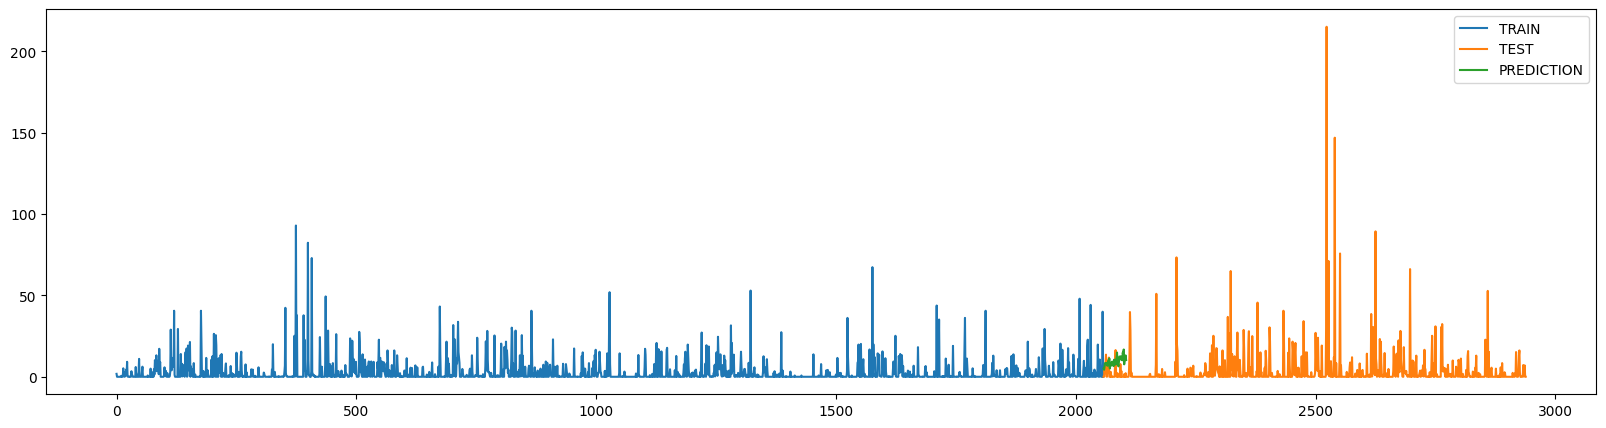

In [98]:
train_data['Rain(mm)'].plot(legend=True, label='TRAIN', figsize=(20,5))
test_data['Rain(mm)'].plot(legend=True, label='TEST')
test_prediction_rain.plot(legend=True, label='PREDICTION')

<Axes: >

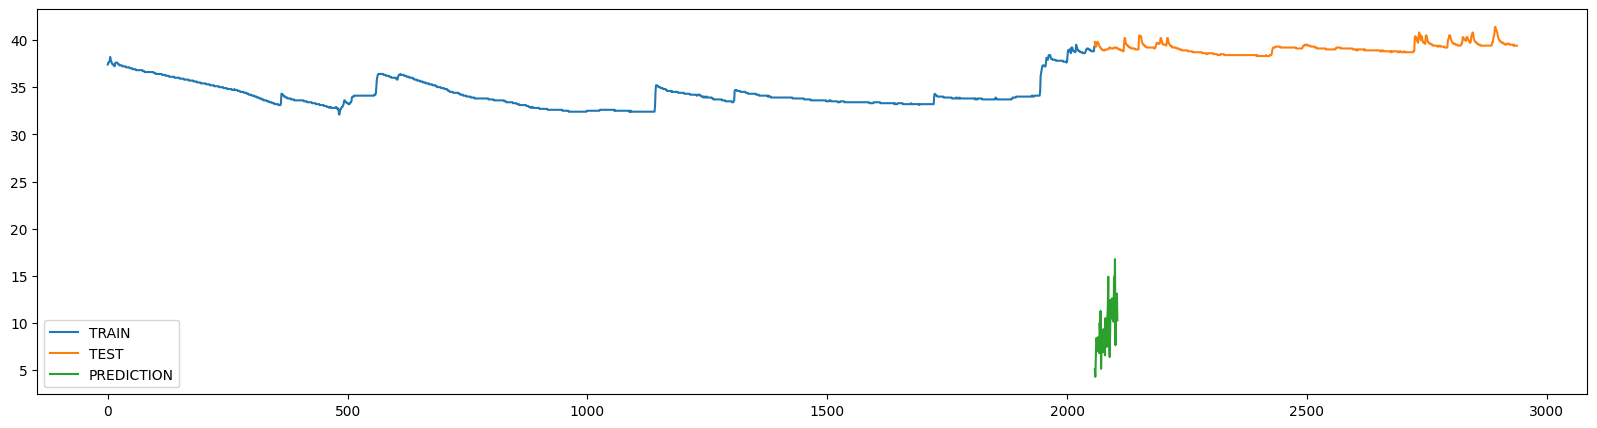

In [99]:
train_data['SoilMoist(%)'].plot(legend=True, label='TRAIN', figsize=(20,5))
test_data['SoilMoist(%)'].plot(legend=True, label='TEST')
test_prediction_rain.plot(legend=True, label='PREDICTION')

In [100]:
test_data.describe()

,Date,WDir(Deg),WSpd(m/s),GustDir(Deg),GustSpd(m/s),WindRun(Km),Rain(mm),Tdry(c),Twet(c),RH(%),...,ET10©,ET20©,ET100©,Pmsl(hPa),Pstn(hPa),Sun(Hrs),Rad(MJ/m2),Tavg,Evaporation(mm),SoilMoist(%)
count,8.810000e+02,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,...,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000,881.000000
mean,2.022572e+07,181.612940,2.520204,160.379682,9.876731,255.156073,4.069467,16.778774,14.985585,82.164586,...,17.370715,17.448241,17.827923,1016.056867,1014.144154,6.520318,14.985210,17.034677,2.858002,39.151646
std,7.553001e+03,101.628909,1.717576,99.229287,7.715633,116.088455,12.499454,3.708242,3.434250,11.556243,...,3.956356,3.703168,2.758251,7.838166,7.821895,3.859205,7.627378,3.764489,1.667042,0.529751
min,2.021102e+07,0.000000,0.000000,2.000000,-175.700000,9.000000,0.000000,6.400000,5.900000,48.000000,...,7.800000,8.800000,12.100000,978.400000,976.600000,0.000000,0.610000,7.500000,0.000000,38.300000
25%,2.022053e+07,86.000000,1.100000,53.000000,7.700000,171.000000,0.000000,14.000000,12.500000,73.000000,...,14.200000,14.400000,15.500000,1011.400000,1009.500000,3.600000,8.400000,14.300000,1.500000,38.800000
50%,2.023010e+07,184.000000,2.200000,179.000000,9.800000,233.000000,0.000000,17.200000,15.000000,82.000000,...,17.900000,18.200000,18.200000,1016.600000,1014.700000,6.700000,14.690000,17.400000,2.600000,39.100000
75%,2.023081e+07,256.000000,3.600000,237.000000,12.400000,320.000000,3.000000,19.800000,17.700000,92.000000,...,20.600000,20.500000,20.300000,1021.400000,1019.500000,9.600000,21.080000,20.000000,4.000000,39.400000
max,2.024032e+07,360.000000,11.400000,360.000000,22.600000,762.000000,215.200000,25.200000,24.000000,100.000000,...,25.800000,25.100000,22.400000,1038.600000,1036.600000,13.900000,31.930000,25.250000,8.200000,41.400000


In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(test_data['Rain(mm)'], test_prediction_rain)
mean_squared_error(test_data['Rain(mm)'], test_prediction_rain)

ValueError: Found input variables with inconsistent numbers of samples: [881, 48]